In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define Nifty 50 Index symbol for Yahoo Finance
nifty_symbol = "^NSEI"

# Define start and end dates for full history (from 2000 onwards)
start_date = "2000-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')  # Today's date

# Fetch the data using yfinance
print(f"Downloading Nifty 50 data from {start_date} to {end_date}...")
nifty_data = yf.download(nifty_symbol, start=start_date, end=end_date, interval="1d")

# Check if data is empty
if nifty_data.empty:
    print("❌ No data fetched. Check your internet connection or symbol.")
else:
    # Reset index to make Date a column
    nifty_data.reset_index(inplace=True)

    # Save to CSV
    filename = "nifty50_full_data.csv"
    nifty_data.to_csv(filename, index=False)
    print(f"✅ Data saved successfully to '{filename}'")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

✅ Data saved successfully to 'nifty50_full_data.csv'


In [2]:
nifty = yf.Ticker("^NSEI")
live_price = nifty.history(period="1d")
print("Current Nifty Price:", live_price['Close'].iloc[-1])


Current Nifty Price: 25019.80078125


In [7]:
import pandas as pd

In [8]:
df = pd.read_csv(r"nifty50_full_data.csv")

In [9]:
df = df.iloc[1:].reset_index(drop=True)

In [10]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2007-09-17,4494.64990234375,4549.0498046875,4482.85009765625,4518.4501953125,0
1,2007-09-18,4546.2001953125,4551.7998046875,4481.5498046875,4494.10009765625,0
2,2007-09-19,4732.35009765625,4739.0,4550.25,4550.25,0
3,2007-09-20,4747.5498046875,4760.85009765625,4721.14990234375,4734.85009765625,0
4,2007-09-21,4837.5498046875,4855.7001953125,4733.7001953125,4752.9501953125,0


In [11]:
df.tail()

,Date,Close,High,Low,Open,Volume
4323,2025-05-09,24008.0,24164.25,23935.75,23935.75,335600
4324,2025-05-12,24924.69921875,24944.80078125,24378.849609375,24420.099609375,368700
4325,2025-05-13,24578.349609375,24973.80078125,24547.5,24864.05078125,423000
4326,2025-05-14,24666.900390625,24767.55078125,24535.55078125,24613.80078125,345500
4327,2025-05-15,25062.099609375,25116.25,24494.44921875,24694.44921875,500800


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\P

📊 Evaluation Metrics:
MAE  (Mean Absolute Error)     : 3114.1291
MSE  (Mean Squared Error)      : 12779768.2379
RMSE (Root Mean Squared Error) : 3574.8802
R² Score (Coefficient of Determination): -2.8194


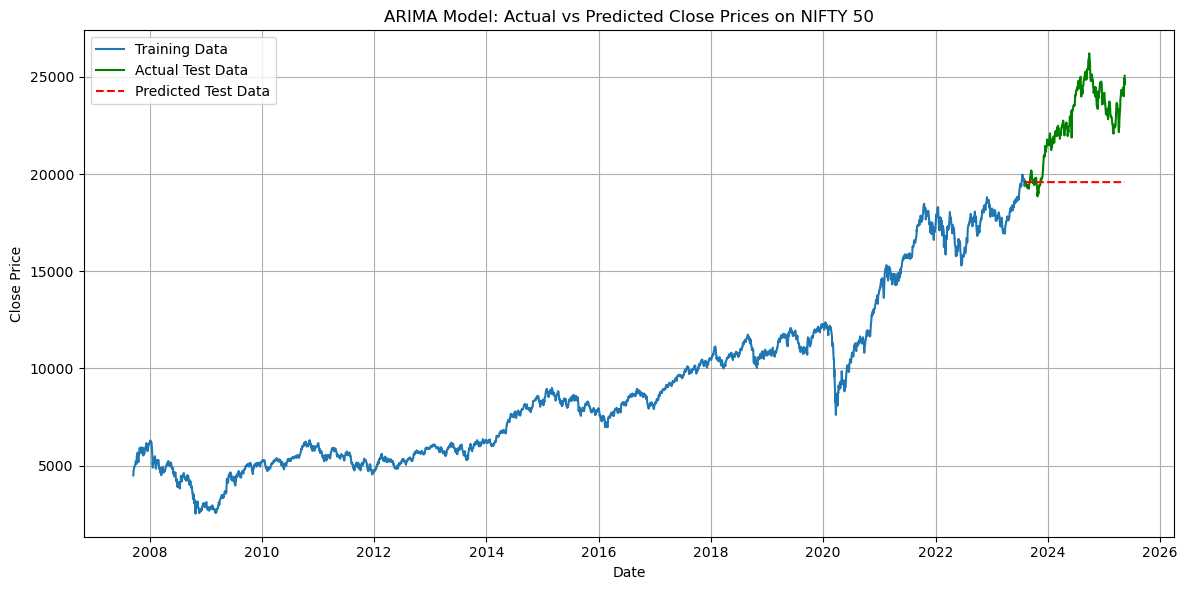

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load dataset
df = pd.read_csv("nifty50_full_data.csv")

df = df.drop(["High","Low","Open"],axis = 1)

# Convert and clean
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Ensure 'Close' is numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df = df.dropna(subset=['Close'])

# Split into train and test (90% train, 10% test)
close_data = df['Close']
split_index = int(len(close_data) * 0.9)
train = close_data[:split_index]
test = close_data[split_index:]

# Fit ARIMA
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluation Metrics
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test, forecast)

print("📊 Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error)     : {mae:.4f}")
print(f"MSE  (Mean Squared Error)      : {mse:.4f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.4f}")
print(f"R² Score (Coefficient of Determination): {r2:.4f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Test Data', color='green')
plt.plot(test.index, forecast, label='Predicted Test Data', color='red', linestyle='--')
plt.title("ARIMA Model: Actual vs Predicted Close Prices on NIFTY 50")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## LSTM

C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


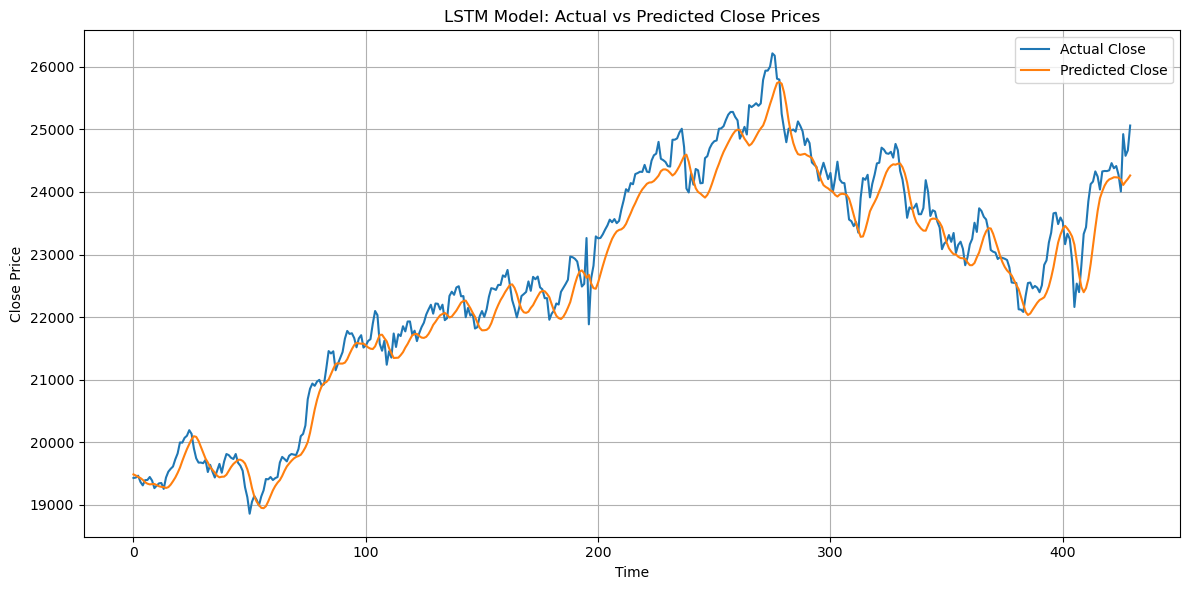

(293.41337209302327, 134132.63041216828, 366.2412188874544, 0.9593878507833415)

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load dataset
df = pd.read_csv("nifty50_full_data.csv")

# Preprocess
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

# Split 90% train, 10% test
split = int(len(X) * 0.9)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM model with multiple LSTM layers
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(32, return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

# Predict
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test)

# Evaluation
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(actual_prices, predicted_prices)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Close')
plt.plot(predicted_prices, label='Predicted Close')
plt.title("LSTM Model: Actual vs Predicted Close Prices")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

(mae, mse, rmse, r2)


## Stacked LSTM

Epoch 1/25


C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0138
Epoch 2/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7887e-04
Epoch 3/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8938e-04
Epoch 4/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9003e-04
Epoch 5/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7789e-04
Epoch 6/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6208e-04
Epoch 7/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6725e-04
Epoch 8/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8155e-04
Epoch 9/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6404e-04
Epoch 10/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.3119e-04
Epoch 11/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2771e-04
Epoch 12/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1391e-04
Epoch 13/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6743e-04
Epoch 14/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.4376e-05
Ep

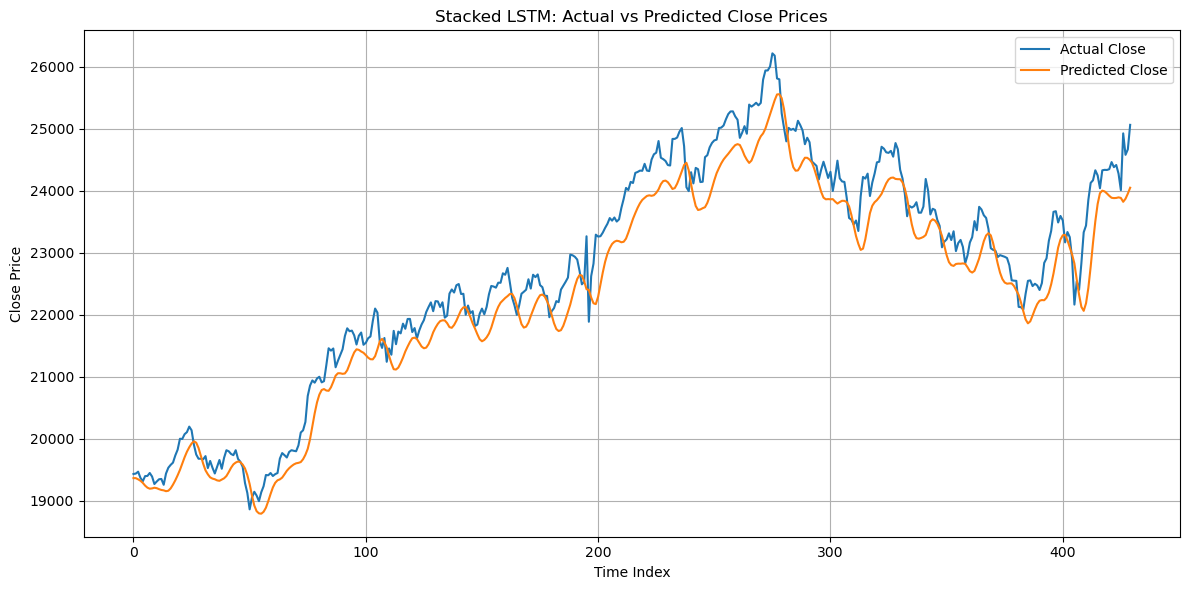

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset
df = pd.read_csv("nifty50_full_data.csv")

# Preprocess
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)

# Normalize 'Close' column
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])

# Function to create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

seq_len = 30  # lookback window
X, y = create_sequences(scaled_data, seq_len)

# Train-test split (90%-10%)
split = int(len(X) * 0.9)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build Stacked LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_len, 1)),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

# Predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)

# Evaluation
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Print metrics
print(f"📊 MAE  : {mae:.2f}")
print(f"📊 MSE  : {mse:.2f}")
print(f"📊 RMSE : {rmse:.2f}")
print(f"📊 R²    : {r2:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual Close')
plt.plot(y_pred, label='Predicted Close')
plt.title("Stacked LSTM: Actual vs Predicted Close Prices")
plt.xlabel("Time Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## GRU

Epoch 1/20


C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0205
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.8029e-05
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.5294e-05
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.9956e-05
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.4376e-05
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.6679e-05
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9158e-05
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2511e-05
Epoch 9/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9986e-05
Epoch 10/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.6009e-05
Epoch 11/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.7228e-05
Epoch 12/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.5354e-05
Epoch 13/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.6943e-05
Epoch 14/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.1967e-05
Epoch 15/20
132/

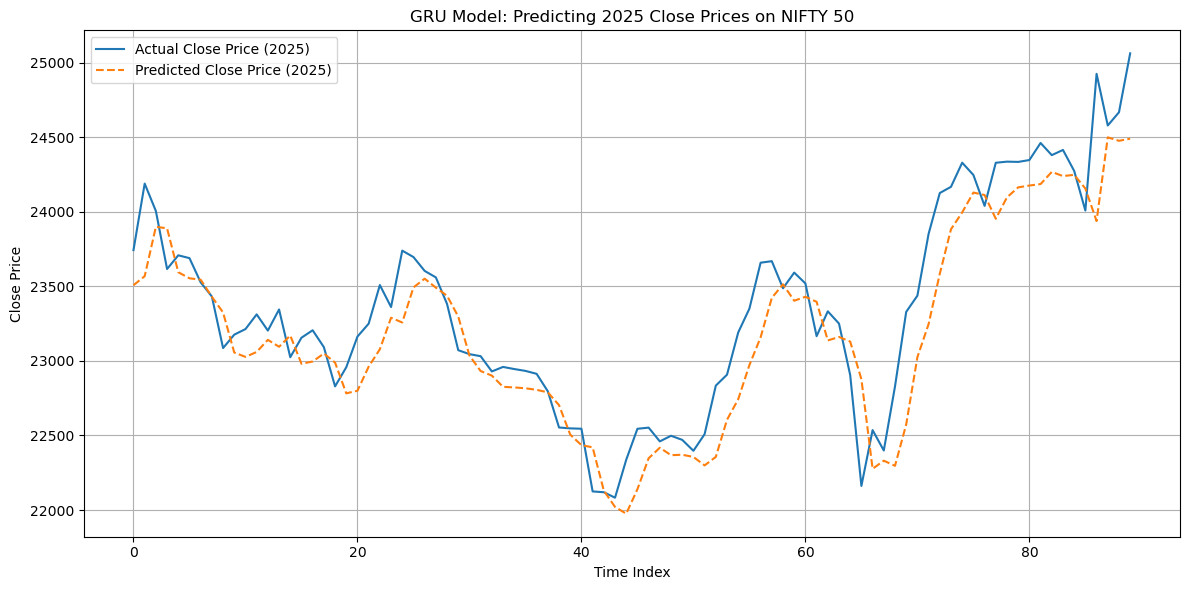

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Load dataset
df = pd.read_csv("nifty50_full_data.csv")

# Convert and clean
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)

# Separate train (till 2024) and test (2025 onwards)
train_df = df[df.index < '2025-01-01']
test_df = df[df.index >= '2025-01-01']

# Fit scaler only on training data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[['Close']])
test_scaled = scaler.transform(test_df[['Close']])

# Function to create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

seq_len = 30

# Create sequences
X_train, y_train = create_sequences(train_scaled, seq_len)

# For test data, append last 30 days of train to build proper sequence
combined_test = np.concatenate((train_scaled[-seq_len:], test_scaled), axis=0)
X_test, y_test = create_sequences(combined_test, seq_len)

# Reshape for GRU input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build GRU model
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(seq_len, 1)),
    GRU(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predict
predicted_scaled = model.predict(X_test)
predicted = scaler.inverse_transform(predicted_scaled)
actual = scaler.inverse_transform(y_test)

# Evaluation Metrics
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predicted)

print("📊 Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error)     : {mae:.4f}")
print(f"MSE  (Mean Squared Error)      : {mse:.4f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.4f}")
print(f"R² Score (Coefficient of Determination): {r2:.4f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Close Price (2025)')
plt.plot(predicted, label='Predicted Close Price (2025)', linestyle='--')
plt.title("GRU Model: Predicting 2025 Close Prices on NIFTY 50")
plt.xlabel("Time Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## GRU

Epoch 1/20


C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0214
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.2418e-05
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.6809e-05
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.8364e-05
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.8923e-05
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.3764e-05
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.2628e-05
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.1076e-05
Epoch 9/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.7416e-05
Epoch 10/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.9462e-05
Epoch 11/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.8520e-05
Epoch 12/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.8883e-05
Epoch 13/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.8586e-05
Epoch 14/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.6047e-05
Epoch 15/20
132/

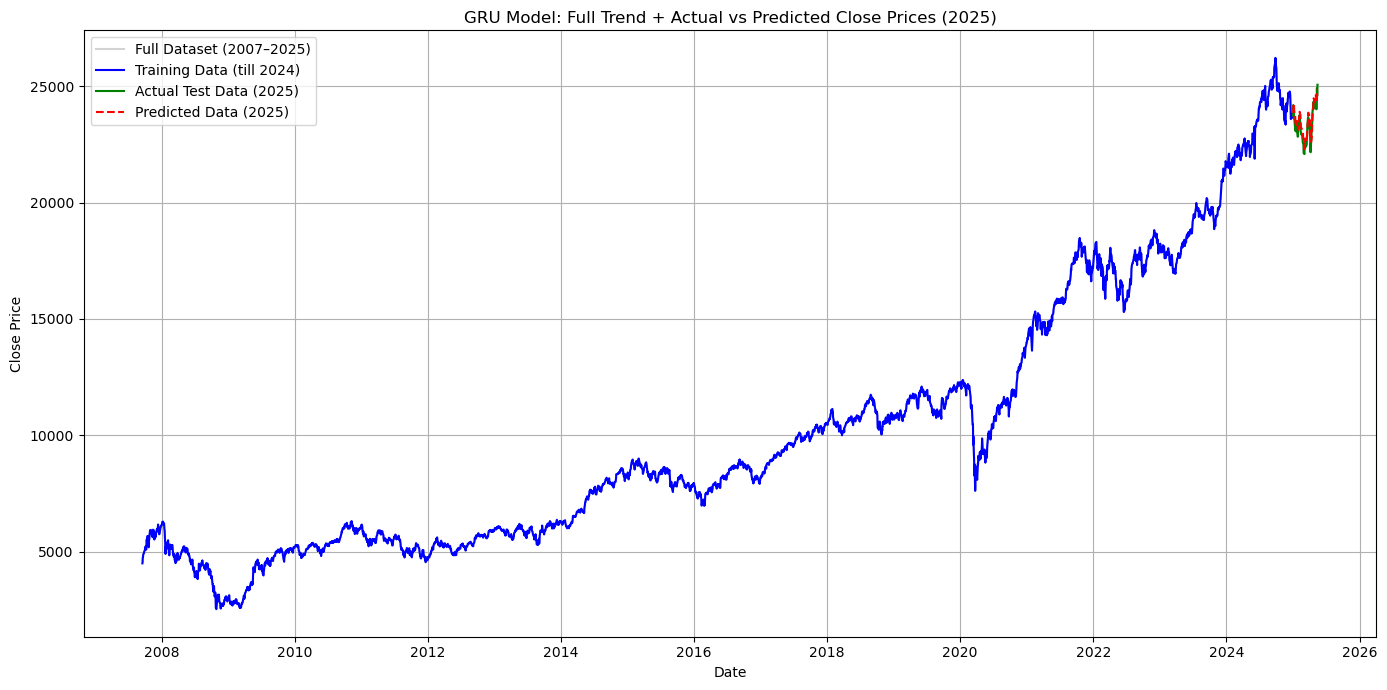

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Load dataset
df = pd.read_csv("nifty50_full_data.csv")

# Convert and clean
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)

# Train-test split: train = till 2024, test = from 2025
train_df = df[df.index < '2025-01-01']
test_df = df[df.index >= '2025-01-01']

# Scale based on training data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[['Close']])
test_scaled = scaler.transform(test_df[['Close']])

# Create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

seq_len = 30
X_train, y_train = create_sequences(train_scaled, seq_len)

# For test, append last 30 days from train to start of test
combined_test = np.concatenate((train_scaled[-seq_len:], test_scaled), axis=0)
X_test, y_test = create_sequences(combined_test, seq_len)

# Reshape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build GRU model
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(seq_len, 1)),
    GRU(32),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predict
predicted_scaled = model.predict(X_test)
predicted = scaler.inverse_transform(predicted_scaled)
actual = scaler.inverse_transform(y_test)

# Evaluation Metrics
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predicted)

print("📊 Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error)     : {mae:.4f}")
print(f"MSE  (Mean Squared Error)      : {mse:.4f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.4f}")
print(f"R² Score (Coefficient of Determination): {r2:.4f}")


# Plot full data with train, test, and prediction
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Full Dataset (2007–2025)', color='lightgray')
plt.plot(train_df.index, train_df['Close'], label='Training Data (till 2024)', color='blue')
plt.plot(test_df.index[-len(actual):], actual, label='Actual Test Data (2025)', color='green')
plt.plot(test_df.index[-len(predicted):], predicted, label='Predicted Data (2025)', color='red', linestyle='--')

plt.title("GRU Model: Full Trend + Actual vs Predicted Close Prices (2025)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
